In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor , Lasso,Ridge, LinearRegression,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor,StackingRegressor,BaggingRegressor
from sklearn import metrics 
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [2]:
calories = pd.read_csv(r"calories.csv")
exercise = pd.read_csv(r"exercise.csv")


In [3]:
calories.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
print(f"{calories.shape}-shape of calroies \t shape of exercise {exercise.shape}")

(15000, 2)-shape of calroies 	 shape of exercise (15000, 8)


In [5]:
# Merging the two csv files based on userid

In [6]:
burnt_data = pd.merge(exercise,calories,on='User_ID')
burnt_data.reset_index(drop = True,inplace=True)

In [7]:
burnt_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
burnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
for i in burnt_data:
    print("*"*30+i+"*"*30)
    print(list(burnt_data[i].unique()))
    print()

******************************User_ID******************************
[14733363, 14861698, 11179863, 16180408, 17771927, 15130815, 19602372, 11117088, 12132339, 17964668, 13723164, 13681290, 15566424, 12891699, 13823829, 17557348, 12198133, 15236104, 11042324, 16864285, 11674347, 19797300, 14711095, 14434854, 14893804, 17231597, 10901446, 15874362, 15569252, 15615743, 13363046, 17572853, 17157339, 18328111, 19303479, 10699201, 15283313, 16324247, 14277710, 10888188, 13379795, 17181524, 15988442, 19538533, 14591877, 14274480, 16818429, 17476522, 16369885, 17816292, 15995398, 17615432, 10146087, 17967445, 19670291, 10580576, 15854213, 11138472, 18276801, 13823902, 19222133, 13231909, 12726617, 12538968, 10941668, 12628985, 17691320, 17822027, 13777657, 19423359, 14701930, 11513205, 11842710, 12576313, 12367125, 16913504, 19439155, 16137644, 11622081, 17374074, 19096890, 19628507, 16918679, 11194130, 18863486, 11754581, 15161631, 18735761, 15878611, 19249559, 15469030, 11157560, 19576971, 1

In [10]:
user_id = burnt_data[["User_ID"]] # storing user id's
burnt_data.drop(columns="User_ID",inplace=True)

# checking and droping duplicates

In [11]:
burnt_data[burnt_data.duplicated()]
# No duplicates 

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
12852,female,28,164.0,59.0,9.0,90.0,39.5,40.0


# TREATING MISSSING VALUES

In [12]:
burnt_data.isnull().sum()
#No missing values

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# checking outliers

Age              Axes(0.125,0.712609;0.352273x0.167391)
Height        Axes(0.547727,0.712609;0.352273x0.167391)
Weight           Axes(0.125,0.511739;0.352273x0.167391)
Duration      Axes(0.547727,0.511739;0.352273x0.167391)
Heart_Rate        Axes(0.125,0.31087;0.352273x0.167391)
Body_Temp      Axes(0.547727,0.31087;0.352273x0.167391)
Calories             Axes(0.125,0.11;0.352273x0.167391)
dtype: object

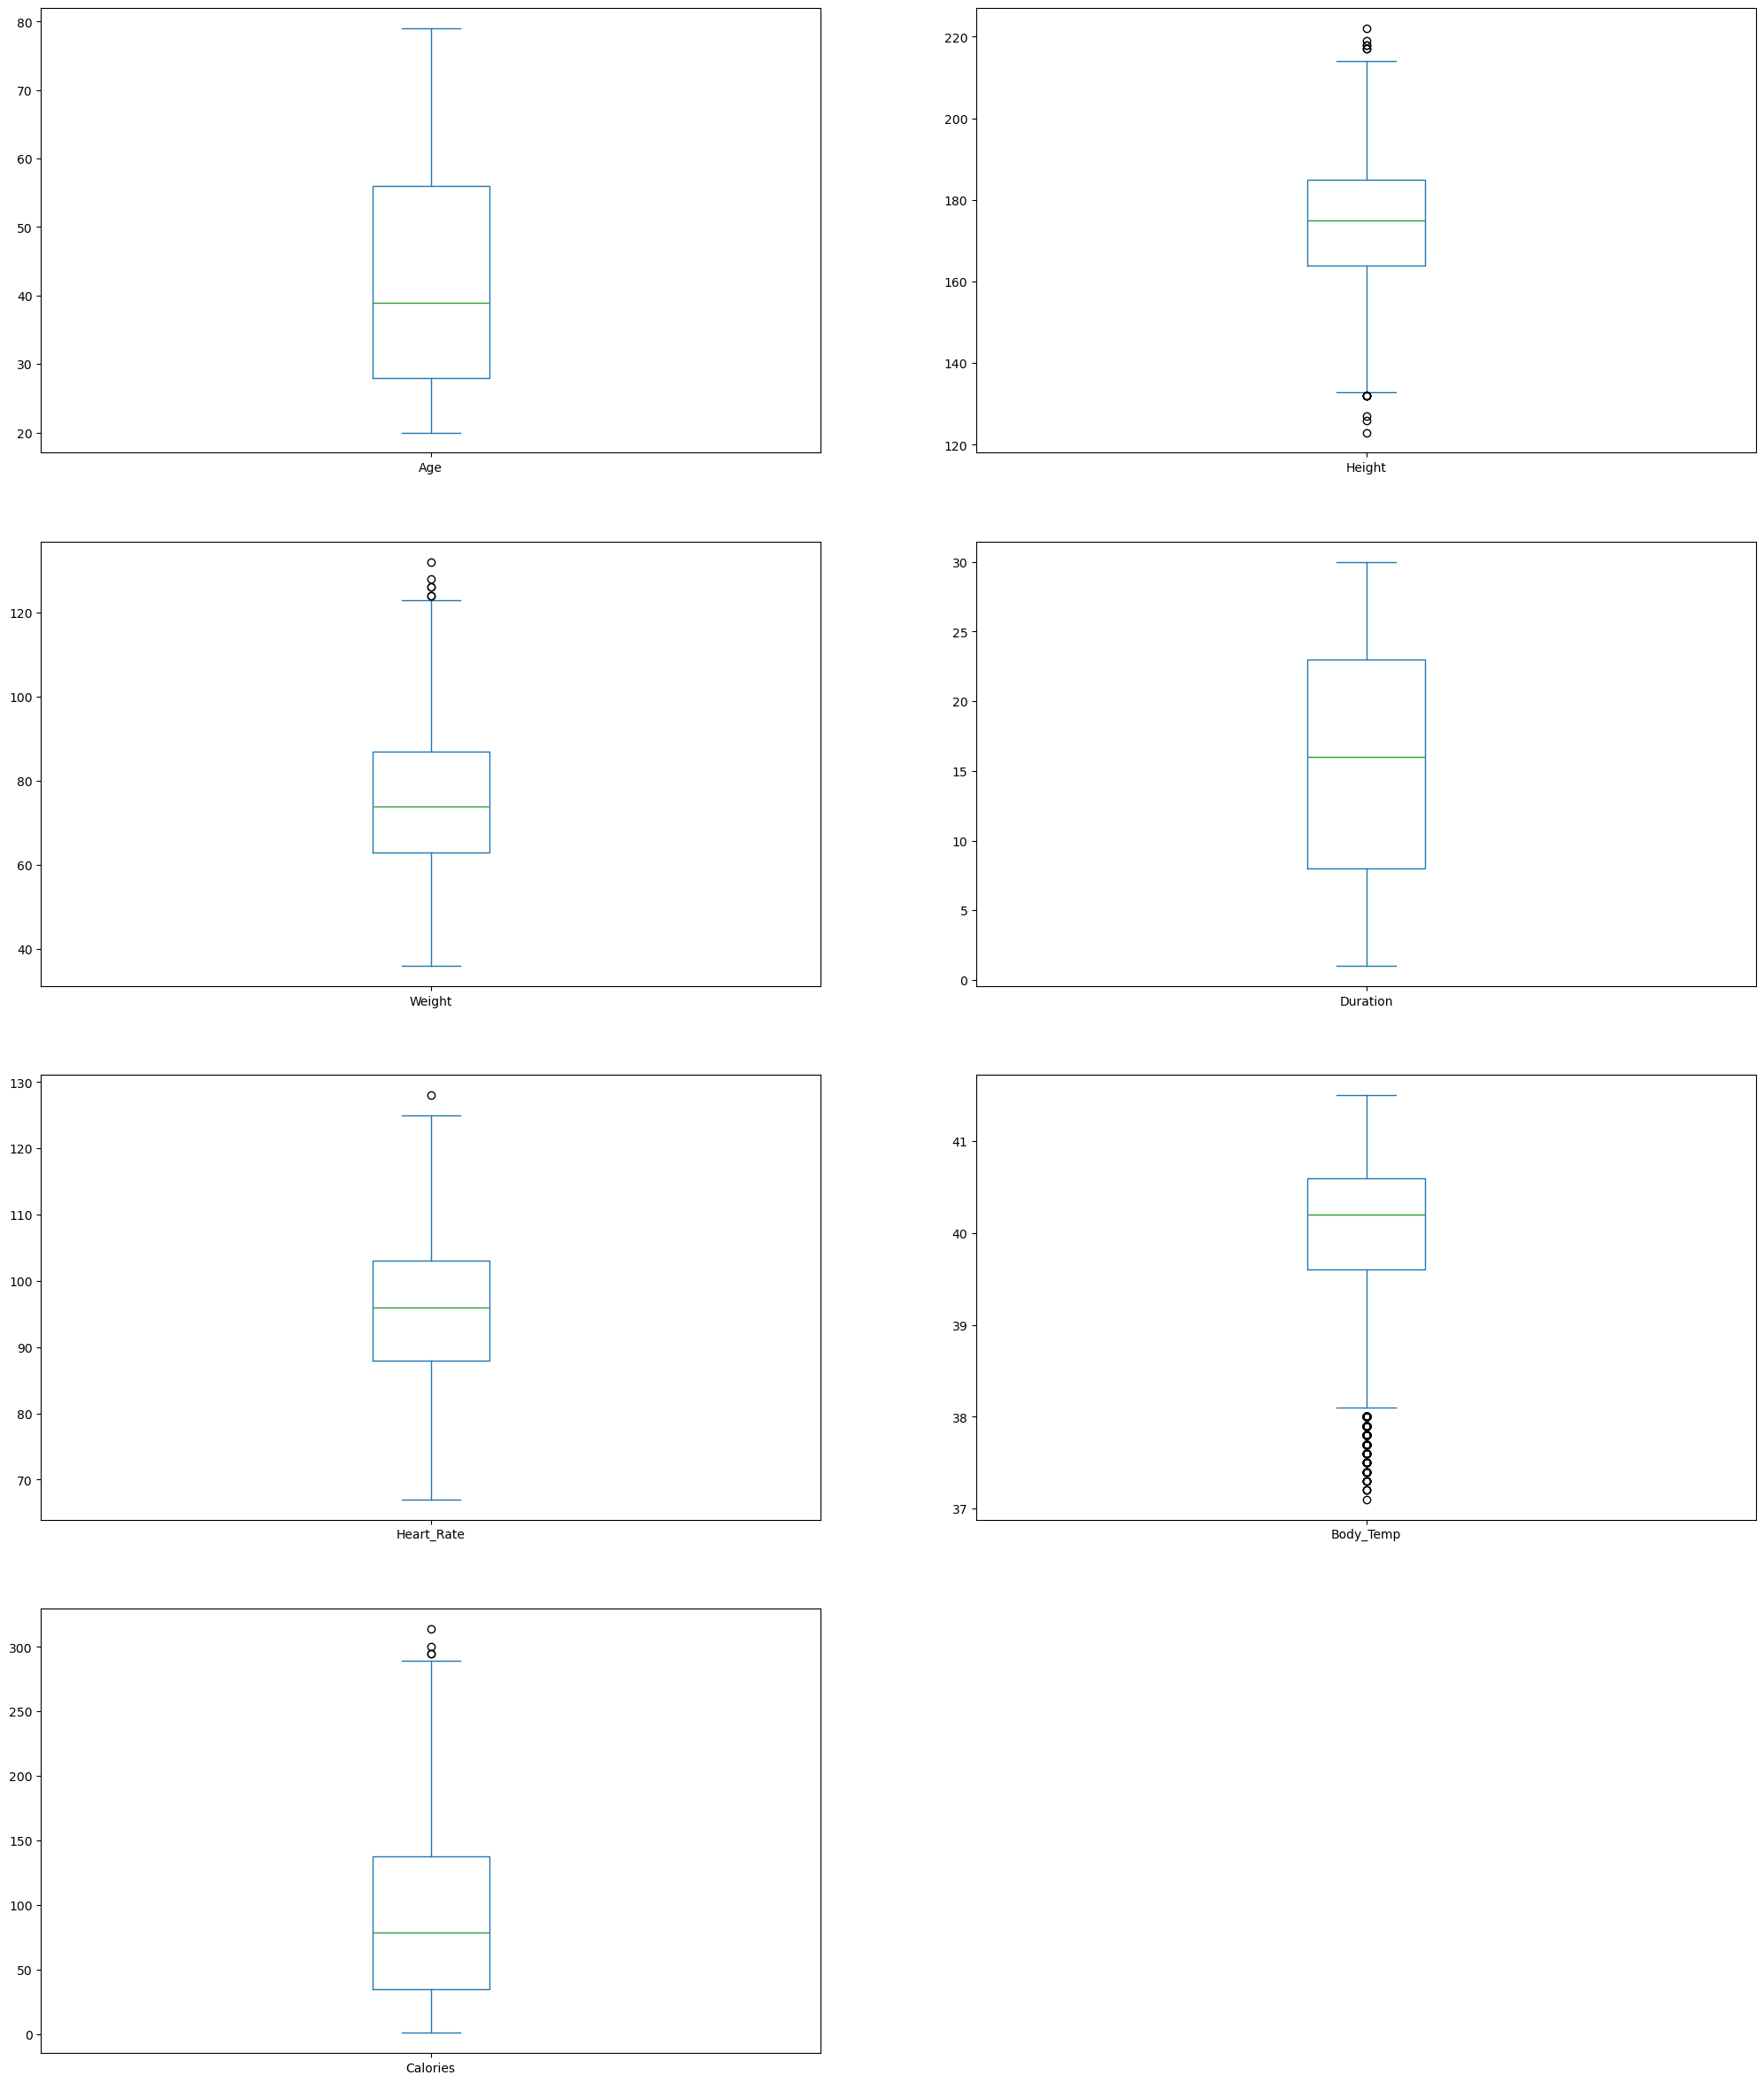

In [13]:
burnt_data.plot(kind = 'box',layout=(4,2) ,subplots=True,figsize=(25,30))

# Encoding

In [14]:
burnt_data = pd.get_dummies(burnt_data,dtype = int ,drop_first=True)

In [15]:
burnt_data.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,0


# decribing

In [16]:
burnt_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533,0.496467
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978,0.500004
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000,0.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000,0.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000,0.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000,1.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000,1.000000


# measuring skewness

In [17]:
burnt_data.skew()

Age            0.473383
Height        -0.006190
Weight         0.226725
Duration       0.004751
Heart_Rate    -0.010704
Body_Temp     -0.994382
Calories       0.505371
Gender_male    0.014135
dtype: float64

In [18]:
# Checkking Correlation

<Axes: >

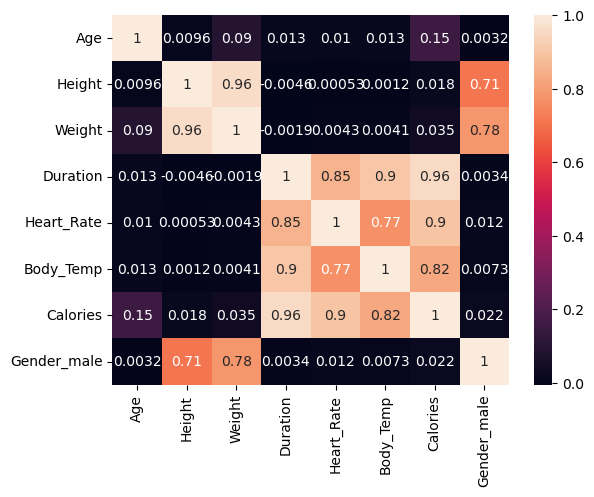

In [19]:
sns.heatmap(burnt_data.corr(),annot=True)

In [20]:
# from above correlation_matrix only three variables highly correlated with target varaible


# Sepearating target and independent varaiable

In [21]:
X=burnt_data[["Body_Temp","Duration","Heart_Rate","Gender_male"]]
y=burnt_data.Calories

In [22]:
X.head()

,Body_Temp,Duration,Heart_Rate,Gender_male
0,40.8,29.0,105.0,1
1,40.3,14.0,94.0,0
2,38.7,5.0,88.0,1
3,40.5,13.0,100.0,0
4,39.8,10.0,81.0,0


# Scaling the data

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scal = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

# train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [25]:
def scores_algo(X,y):
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)
    algos= dict(zip('lr Lasso ridge ElasticNET RandomForestRegressor GradientBoostingRegressor Xgboost'.split(), [LinearRegression(), Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),GradientBoostingRegressor(),XGBRegressor()]))
    all_algo_score=pd.DataFrame({"model_name":algos.keys()})
    train_score = []
    test_score=[]
    for i,model in algos.items():
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        pred_test =model.predict(X_test)
        train_score.append(metrics.mean_absolute_error(y_train,pred_train))
        test_score.append(metrics.mean_absolute_error(y_test,pred_test))
    all_algo_score["train_score"]=train_score
    all_algo_score["test_score"]=test_score 
    return all_algo_score
        
        

In [26]:
scores_algo(x_scal,y)

,model_name,train_score,test_score
0,lr,10.521619,10.647638
1,Lasso,11.042879,11.151104
2,ridge,10.521270,10.647393
3,ElasticNET,15.988809,16.281189
4,RandomForestRegressor,5.173183,8.762621
5,GradientBoostingRegressor,7.782099,8.083838
6,Xgboost,6.777288,8.317723


**so from above observation gradeint boosting regressor as least mean sqaure and no much variance b/w train and test score.**

In [27]:
gradientboost = GradientBoostingRegressor()
gradientboost.fit(X_train,y_train)
y_train_preds = gradientboost.predict(X_train)
y_test_preds = gradientboost.predict(X_test)
print(f'Test r2_score: {metrics.r2_score(y_test,y_test_preds)}  Train r2_score :{metrics.r2_score(y_train,y_train_preds)}')

Test r2_score: 0.9644621346023251  Train r2_score :0.9658989575647431


In [30]:
#saving the model
import pickle as pk
pk.dump(gradientboost,open('calories.pk','wb'))


In [31]:
calories = pk.load(open('calories.pk','rb'))

In [32]:
calories.feature_importances_

array([5.09283698e-04, 8.87489500e-01, 1.08631061e-01, 3.37015488e-03])